## 1. Introduction

Airbnb has become increasingly important in London’s housing debate. To understand the scale of the "problem" and the potential impact of the opposition's proposals, we analyzed the spatial distribution of listings from five perspectives. 

In [12]:
!pip install ydata-profiling
from pathlib import Path
from ydata_profiling import ProfileReport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
import os
os.getcwd()

'/home/jovyan/work/013/teamwork'

In [20]:
df = pd.read_csv("20250615-London-listings/listings.csv")

In [21]:
print(df.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

## 2. Is Airbnb ‘out of control’ in London?

### 1. Spatial Concentration of Entire-Home Listings （Is Airbnb over comercialization？

The figure below shows the spatial distribution of entire home/apt Airbnb listings in London.

We first investigated the proportion of entire-home rental listings in London. Only entire homes occupy spaces that would otherwise be rented long-term, thus impacting housing supply. Filtering all "entire homes" from all Airbnb listings helps to observe the factors truly affecting the housing market.

The results show that Airbnb listings in London are unevenly distributed. Entire-home rental listings are mainly concentrated in central London areas such as Westminster, Camden, Kensington-Chelsea, Tahamreets, and Hackney—areas already facing the most severe housing pressure. Airbnb activity is concentrated in areas with high rents, high demand, and many tourists. The number of entire-home rental listings in the outer suburbs of London is significantly lower, indicating that the problem is not widespread citywide but rather localized.

Therefore, through spatial analysis of entire-home rental listings, we believe that it cannot be said that Airbnb's "loss of control" is a problem across London as a whole; it's just that the central urban areas are more prone to this risk.


<Axes: xlabel='longitude', ylabel='latitude'>

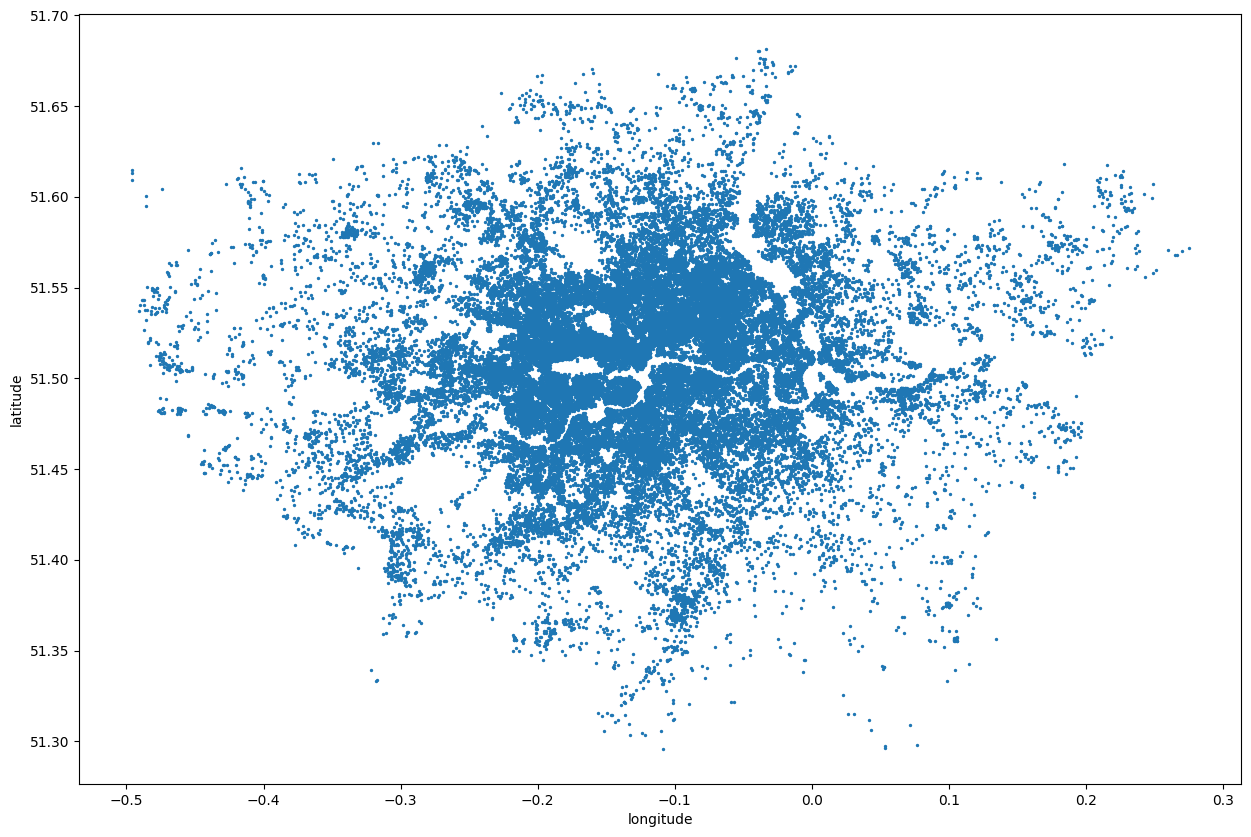

In [22]:
homeapt = df[df.room_type == 'Entire home/apt']
#This is the plot way in practical 6, but I print only the entire home and apartment.
homeapt.plot.scatter(x='longitude', y='latitude', s=2, figsize=(15,10))
#Maybe helps a bit..

### 2. Is Airbnb hosts may against the policy(short-let regulation)(https://www.nestify.co.uk/article/90-day-rule/)

Policy can serve as another criterion for judging whether something is out of control.

London planning regulations stipulate that unless the host holds a formal planning permit, an entire Airbnb listing cannot be rented for more than 90 nights per year. Using availability_365 data, we categorized entire listings as follows: Potentially non-compliant: availability_365 > 90. Compliant: availability_365 ≤ 90. The findings show that a large number of entire listings have more than 90 available nights, indicating that many hosts may be over-operating. Some listings have more than 200-300 available nights, indicating that they are operating commercially almost year-round. This directly supports the argument that additional controls may be needed, such as mandatory registration or higher council taxes on professional hosts.

In [26]:
#entire house in renting and avaliability in a year
morethan90=(df.room_type=='Entire home/apt') & (df.availability_365 > 90)

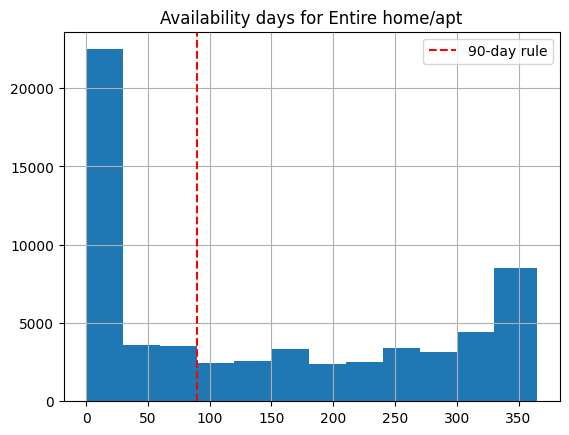

In [28]:
homeapt.availability_365.hist(bins=[0,30,60,90,120,150,180,210,240,270,300,330,365],)
#use a red line to separate less or over 90 days.
plt.axvline(90, color='red', linestyle='--', label='90-day rule')
plt.title("Availability days for Entire home/apt")
plt.legend()
plt.show()

In [29]:
df['over90']=df.availability_365 > 90
df['less90']=df.availability_365 <= 90
print("There are", df.over90.sum(), "houses may violate")
print("There are", df.less90.sum(), "houses are surely legal")

There are 48618 houses may violate
There are 48033 houses are surely legal


### 3. High-Activity Airbnb Hotspots (Top 10% Most Active Listings)

Activity level can serve as another criterion.

As the graph shows, the most active (actually commercial) listings are highly concentrated in the aforementioned central urban areas. The behavior of these listings is more consistent with year-round tourist accommodations than temporary home sharing. There are almost no highly active listings in the outer suburbs. This pattern further confirms the geographically concentrated nature of Airbnb's commercialization. In areas with the highest property prices, the most profitable short-term rental listings are also concentrated, exacerbating the local housing shortage.

This suggests that while Airbnb may not be out of control citywide, it has achieved commercial dominance in a few key areas.

Text(0.5, 1.0, 'Spatial Distribution of Reviews Highly Active Airbnb')

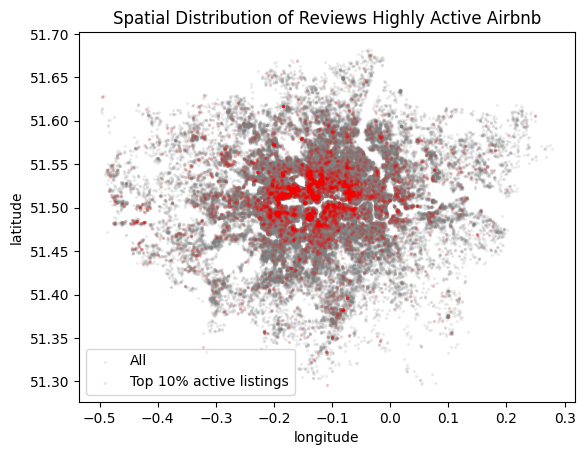

In [31]:
#I select the most active review's airbnb, and plot it in red with all airbnb which is grey.
highactive = df[df.reviews_per_month > df.reviews_per_month.quantile(0.90)]
allairbnb = df.plot.scatter(x='longitude', y='latitude',s=2, alpha=0.1, color='grey', label='All')
highactive.plot.scatter(ax=allairbnb,x='longitude', y='latitude',s=2, alpha=0.1,color='red', label='Top 10% active listings')
plt.title("Spatial Distribution of Reviews Highly Active Airbnb")